In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import glob

In [2]:
btc_trades_df = pd.concat([pd.read_csv(f) for f in glob.glob("../raw_data/BTCUSDT-trades*.csv")], ignore_index=True)
btc_trades_df['receive_ts'] = pd.to_datetime(btc_trades_df['trade_time'], unit='ms')
btc_trades_df['exchange_ts'] = btc_trades_df['receive_ts']
btc_trades_df.rename(columns={'side': 'aggro_side'}, inplace=True)
btc_trades_df.drop(columns=["trade_id", "trade_time"], inplace=True)
btc_trades_df['aggro_side'] = btc_trades_df['aggro_side'].replace({'BUY': 'BID', "SELL": "ASK"})

In [3]:
btc_trades_df.set_index('receive_ts', inplace=True)
btc_trades_df.sort_values(by=['exchange_ts'], inplace=True)
btc_trades_df.reset_index(inplace=True)

In [4]:
btc_trades_df.to_csv("../data/trades.csv")

In [5]:
btc_trades_df.head()

,receive_ts,price,size,aggro_side,exchange_ts
0,2023-01-09 00:00:00.909,17127.5,0.000117,BID,2023-01-09 00:00:00.909
1,2023-01-09 00:00:00.916,17127.5,0.000292,BID,2023-01-09 00:00:00.916
2,2023-01-09 00:00:00.925,17127.5,0.000292,BID,2023-01-09 00:00:00.925
3,2023-01-09 00:00:02.046,17127.5,0.000584,BID,2023-01-09 00:00:02.046
4,2023-01-09 00:00:02.488,17127.5,0.000875,BID,2023-01-09 00:00:02.488


In [6]:
btc_lobs_df = pd.read_csv("../raw_data/BTCUSDT-LOBS-2023-01-09-2023-01-20.csv")
btc_lobs_df = btc_lobs_df.set_index(btc_lobs_df.columns[0])
btc_lobs_df.index.names = ['']
btc_lobs_df.rename(columns={"%d" % i: "ask_price_%d" % (i-2) for i in range(2, 2, 20)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % i: "bid_price_%d" % (i/2-1) for i in range(2, 22, 2)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % (i+1): "bid_vol_%d" % (i/2-1) for i in range(2, 22, 2)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % i: "ask_price_%d" % (i/2-11) for i in range(22, 42, 2)}, inplace=True)
btc_lobs_df.rename(columns={"%d" % (i+1): "ask_vol_%d" % (i/2-11) for i in range(22, 42, 2)}, inplace=True)
btc_lobs_df["receive_ts"] =pd.to_datetime(btc_lobs_df["1"])
btc_lobs_df["exchange_ts"] = btc_lobs_df["receive_ts"]
btc_lobs_df.drop(columns=["0", "1"], inplace=True)

In [7]:
btc_lobs_df.set_index('receive_ts', inplace=True)
btc_lobs_df = btc_lobs_df[~btc_lobs_df.index.duplicated(keep='first')]
btc_lobs_df.sort_values(by=['receive_ts'], inplace=True)
btc_lobs_df.reset_index(inplace=True)

In [8]:
btc_lobs_df.to_csv("../data/books.csv")

In [9]:
btc_lobs_df.head()

,receive_ts,bid_price_0,bid_vol_0,bid_price_1,bid_vol_1,bid_price_2,bid_vol_2,bid_price_3,bid_vol_3,bid_price_4,...,ask_vol_5,ask_price_6,ask_vol_6,ask_price_7,ask_vol_7,ask_price_8,ask_vol_8,ask_price_9,ask_vol_9,exchange_ts
0,2023-01-09 22:17:40,17181.6,23.371,17181.5,0.746,17181.4,5.428,17181.2,0.89,17181.1,...,5.168,17182.3,0.020,17182.4,6.692,17182.5,1.904,17182.6,2.546,2023-01-09 22:17:40
1,2023-01-09 22:17:41,17181.6,24.232,17181.5,0.694,17181.4,5.428,17181.2,0.89,17181.1,...,6.043,17182.3,0.020,17182.4,6.001,17182.5,1.869,17182.6,2.105,2023-01-09 22:17:41
2,2023-01-09 22:17:42,17181.6,24.403,17181.5,0.686,17181.4,5.428,17181.2,0.89,17181.1,...,6.043,17182.3,0.020,17182.4,6.001,17182.5,3.785,17182.6,1.404,2023-01-09 22:17:42
3,2023-01-09 22:17:43,17181.6,24.376,17181.5,0.689,17181.4,5.429,17181.2,0.89,17181.1,...,6.043,17182.3,0.094,17182.4,6.001,17182.5,2.572,17182.6,1.442,2023-01-09 22:17:43
4,2023-01-09 22:17:44,17181.6,24.376,17181.5,0.715,17181.4,5.429,17181.2,0.89,17181.1,...,3.904,17182.3,0.094,17182.4,6.692,17182.5,1.876,17182.6,1.442,2023-01-09 22:17:44


<Axes: xlabel='receive_ts'>

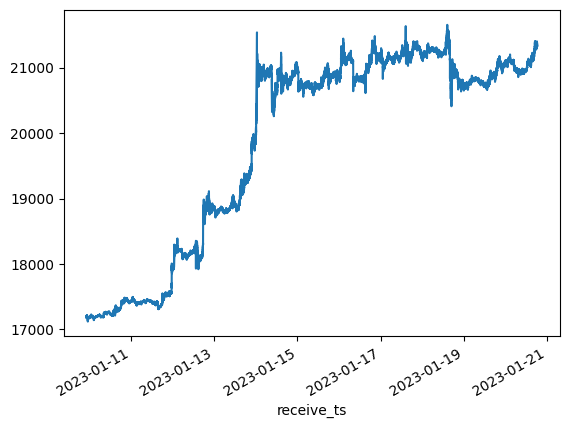

In [10]:
btc_lobs_df.set_index('receive_ts')['ask_price_0'].plot()

In [11]:
btc_lobs_df['mid_price'] = (btc_lobs_df['ask_price_0'] + btc_lobs_df['bid_price_0']) / 2
btc_trades_df['trade'] = btc_trades_df[['aggro_side', 'price', 'size']].values.tolist()

In [12]:
features_df = pd.DataFrame({'receive_ts': btc_lobs_df['receive_ts']})

In [13]:
for column in btc_lobs_df.filter(regex="_price_").columns.values:
    features_df[f'dist_{column}'] = (btc_lobs_df[column] / btc_lobs_df['mid_price'] - 1) * 1e06

In [14]:
for side in ['bid', 'ask']:
    features_df[f'{side}_cumul_0'] = btc_lobs_df[f'{side}_price_0'] * btc_lobs_df[f'{side}_vol_0']

for i in range(1, 10):
    for side in ['bid', 'ask']:
        features_df[f'{side}_cumul_{i}'] = (
                features_df[f'{side}_cumul_{i - 1}'] + btc_lobs_df[f'{side}_price_{i}'] * btc_lobs_df[f'{side}_vol_{i}']
        )

In [15]:
for i in range(10):
    features_df[f'national_imbalance_{i}'] = (
            (features_df[f'ask_cumul_{i}'] - features_df[f'bid_cumul_{i}']) /
            (features_df[f'ask_cumul_{i}'] + features_df[f'bid_cumul_{i}'])
    )

In [16]:
features_df.head()

,receive_ts,dist_bid_price_0,dist_bid_price_1,dist_bid_price_2,dist_bid_price_3,dist_bid_price_4,dist_bid_price_5,dist_bid_price_6,dist_bid_price_7,dist_bid_price_8,...,national_imbalance_0,national_imbalance_1,national_imbalance_2,national_imbalance_3,national_imbalance_4,national_imbalance_5,national_imbalance_6,national_imbalance_7,national_imbalance_8,national_imbalance_9
0,2023-01-09 22:17:40,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.515381,-0.376813,-0.393397,-0.386618,-0.380970,-0.262795,-0.283303,-0.149159,-0.127549,-0.122269
1,2023-01-09 22:17:41,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.547380,-0.442140,-0.446044,-0.437393,-0.455646,-0.304916,-0.324402,-0.197791,-0.174333,-0.172689
2,2023-01-09 22:17:42,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.540835,-0.440197,-0.380386,-0.346720,-0.371943,-0.239821,-0.260059,-0.145441,-0.094626,-0.108612
3,2023-01-09 22:17:43,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.629192,-0.514819,-0.556249,-0.542965,-0.551387,-0.380246,-0.396382,-0.256843,-0.216170,-0.223298
4,2023-01-09 22:17:44,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.635862,-0.520802,-0.561401,-0.547896,-0.573714,-0.457852,-0.472266,-0.302359,-0.272186,-0.275915


In [18]:
bid_price = btc_lobs_df['bid_price_0']
ask_price = btc_lobs_df['ask_price_0']
bid_vol = btc_lobs_df['bid_vol_0']
ask_vol = btc_lobs_df['ask_vol_0']

prev_bid_price = btc_lobs_df['bid_price_0'].shift(1)
prev_ask_price = btc_lobs_df['ask_price_0'].shift(1)
prev_bid_vol = btc_lobs_df['bid_vol_0'].shift(1)
prev_ask_vol = btc_lobs_df['ask_vol_0'].shift(1)

features_df['order_flow_imbalance'] = (
        (bid_price >= prev_bid_price) * bid_vol -
        (bid_price <= prev_bid_price) * prev_bid_vol -
        (ask_price <= prev_ask_price) * ask_vol +
        (ask_price >= prev_ask_price) * prev_ask_vol
)
features_df['order_flow_imbalance'].fillna(0, inplace=True)

/tmp/ipykernel_1697969/1854391449.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df['order_flow_imbalance'].fillna(0, inplace=True)


In [19]:
features_df.head()

,receive_ts,dist_bid_price_0,dist_bid_price_1,dist_bid_price_2,dist_bid_price_3,dist_bid_price_4,dist_bid_price_5,dist_bid_price_6,dist_bid_price_7,dist_bid_price_8,...,national_imbalance_1,national_imbalance_2,national_imbalance_3,national_imbalance_4,national_imbalance_5,national_imbalance_6,national_imbalance_7,national_imbalance_8,national_imbalance_9,order_flow_imbalance
0,2023-01-09 22:17:40,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.376813,-0.393397,-0.386618,-0.380970,-0.262795,-0.283303,-0.149159,-0.127549,-0.122269,0.000
1,2023-01-09 22:17:41,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.442140,-0.446044,-0.437393,-0.455646,-0.304916,-0.324402,-0.197791,-0.174333,-0.172689,1.247
2,2023-01-09 22:17:42,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.440197,-0.380386,-0.346720,-0.371943,-0.239821,-0.260059,-0.145441,-0.094626,-0.108612,-0.013
3,2023-01-09 22:17:43,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.514819,-0.556249,-0.542965,-0.551387,-0.380246,-0.396382,-0.256843,-0.216170,-0.223298,1.697
4,2023-01-09 22:17:44,-2.910081,-8.730244,-14.550407,-26.190733,-32.010895,-37.831058,-43.651221,-49.471384,-55.291547,...,-0.520802,-0.561401,-0.547896,-0.573714,-0.457852,-0.472266,-0.302359,-0.272186,-0.275915,0.122


In [20]:
features_df['spread'] = (btc_lobs_df['ask_price_0'] - btc_lobs_df['bid_price_0']) / btc_lobs_df['mid_price'] * 1e06

In [21]:
btc_lobs_df['returns'] = (btc_lobs_df['mid_price'] / btc_lobs_df['mid_price'].shift(1) - 1).fillna(0)

In [22]:
btc_lobs_df.head()

,receive_ts,bid_price_0,bid_vol_0,bid_price_1,bid_vol_1,bid_price_2,bid_vol_2,bid_price_3,bid_vol_3,bid_price_4,...,ask_vol_6,ask_price_7,ask_vol_7,ask_price_8,ask_vol_8,ask_price_9,ask_vol_9,exchange_ts,mid_price,returns
0,2023-01-09 22:17:40,17181.6,23.371,17181.5,0.746,17181.4,5.428,17181.2,0.89,17181.1,...,0.020,17182.4,6.692,17182.5,1.904,17182.6,2.546,2023-01-09 22:17:40,17181.65,0.0
1,2023-01-09 22:17:41,17181.6,24.232,17181.5,0.694,17181.4,5.428,17181.2,0.89,17181.1,...,0.020,17182.4,6.001,17182.5,1.869,17182.6,2.105,2023-01-09 22:17:41,17181.65,0.0
2,2023-01-09 22:17:42,17181.6,24.403,17181.5,0.686,17181.4,5.428,17181.2,0.89,17181.1,...,0.020,17182.4,6.001,17182.5,3.785,17182.6,1.404,2023-01-09 22:17:42,17181.65,0.0
3,2023-01-09 22:17:43,17181.6,24.376,17181.5,0.689,17181.4,5.429,17181.2,0.89,17181.1,...,0.094,17182.4,6.001,17182.5,2.572,17182.6,1.442,2023-01-09 22:17:43,17181.65,0.0
4,2023-01-09 22:17:44,17181.6,24.376,17181.5,0.715,17181.4,5.429,17181.2,0.89,17181.1,...,0.094,17182.4,6.692,17182.5,1.876,17182.6,1.442,2023-01-09 22:17:44,17181.65,0.0


In [23]:
windows = {'60s': '1m', '300s': '5m', '900s': '15m'}
for w in windows.keys():
    btc_lobs_df[f'gain_{windows[w]}'] = btc_lobs_df.set_index('receive_ts')['returns'].rolling(w).apply(
        lambda x: x[x > 0].sum()
    ).reset_index()['returns']

    print(btc_lobs_df.head(2))

    btc_lobs_df[f'loss_{windows[w]}'] = btc_lobs_df.set_index('receive_ts')['returns'].rolling(w).apply(
        lambda x: x[x < 0].sum()
    ).reset_index()['returns']

           receive_ts  bid_price_0  bid_vol_0  bid_price_1  bid_vol_1  \
0 2023-01-09 22:17:40      17181.6     23.371      17181.5      0.746   
1 2023-01-09 22:17:41      17181.6     24.232      17181.5      0.694   

   bid_price_2  bid_vol_2  bid_price_3  bid_vol_3  bid_price_4  ...  \
0      17181.4      5.428      17181.2       0.89      17181.1  ...   
1      17181.4      5.428      17181.2       0.89      17181.1  ...   

   ask_price_7  ask_vol_7  ask_price_8  ask_vol_8  ask_price_9  ask_vol_9  \
0      17182.4      6.692      17182.5      1.904      17182.6      2.546   
1      17182.4      6.001      17182.5      1.869      17182.6      2.105   

          exchange_ts  mid_price  returns  gain_1m  
0 2023-01-09 22:17:40   17181.65      0.0      0.0  
1 2023-01-09 22:17:41   17181.65      0.0      0.0  

[2 rows x 45 columns]
           receive_ts  bid_price_0  bid_vol_0  bid_price_1  bid_vol_1  \
0 2023-01-09 22:17:40      17181.6     23.371      17181.5      0.746   
1 2023

In [24]:
for w in windows.values():
    features_df[f'CRSI_{w}'] = (
            (btc_lobs_df[f'gain_{w}'] - btc_lobs_df[f'loss_{w}'].abs()) /
            (btc_lobs_df[f'gain_{w}'] + btc_lobs_df[f'loss_{w}'].abs())
    ).fillna(0)

In [58]:
features_df.tail()
btc_lobs_df.describe()

,receive_ts,bid_price_0,bid_vol_0,bid_price_1,bid_vol_1,bid_price_2,bid_vol_2,bid_price_3,bid_vol_3,bid_price_4,...,ask_vol_9,exchange_ts,mid_price,returns,gain_1m,loss_1m,gain_5m,loss_5m,gain_15m,loss_15m
count,935198,935198.000000,935198.000000,935198.000000,935198.000000,935198.000000,935198.000000,935198.000000,935198.000000,935198.000000,...,935198.000000,935198,935198.000000,9.351980e+05,935198.000000,935198.000000,935198.000000,935198.000000,935198.000000,935198.000000
mean,2023-01-15 08:14:30.900780032,19868.021200,17.671873,19867.872966,2.273642,19867.715585,1.388427,19867.563952,1.207947,19867.420422,...,1.290733,2023-01-15 08:14:30.900780032,19868.075171,2.361207e-07,0.001065,-0.001050,0.005323,-0.005252,0.015961,-0.015748
min,2023-01-09 22:17:40,17119.100000,0.001000,17119.000000,0.001000,17118.900000,0.001000,17118.800000,0.001000,17118.600000,...,0.001000,2023-01-09 22:17:40,17119.150000,-6.870910e-03,0.000000,-0.049637,0.000000,-0.123940,0.000000,-0.241592
25%,2023-01-12 15:16:37.249999872,18224.400000,2.832000,18224.300000,0.038000,18224.100000,0.025000,18224.000000,0.025000,18223.900000,...,0.032000,2023-01-12 15:16:37.249999872,18224.450000,0.000000e+00,0.000220,-0.001224,0.001413,-0.006213,0.004582,-0.018879
50%,2023-01-15 08:14:46.500000,20783.800000,11.064500,20783.600000,0.430000,20783.500000,0.260000,20783.300000,0.239000,20783.200000,...,0.296000,2023-01-15 08:14:46.500000,20783.850000,0.000000e+00,0.000565,-0.000556,0.002978,-0.002919,0.009410,-0.009167
75%,2023-01-18 01:12:46.750000128,21048.700000,25.218000,21048.600000,1.995000,21048.400000,1.371000,21048.200000,1.248000,21048.100000,...,1.383000,2023-01-18 01:12:46.750000128,21048.750000,0.000000e+00,0.001250,-0.000216,0.006286,-0.001390,0.019263,-0.004498
max,2023-01-20 18:10:48,21659.800000,1173.433000,21659.200000,452.281000,21659.000000,620.454000,21658.800000,604.625000,21658.700000,...,656.321000,2023-01-20 18:10:48,21659.850000,1.225234e-02,0.050089,0.000000,0.155882,0.000000,0.262107,0.000000
std,NaN,1518.398833,21.036921,1518.380726,5.940244,1518.360468,4.313047,1518.340819,3.588551,1518.323619,...,4.544748,NaN,1518.400071,9.475839e-05,0.001661,0.001623,0.007301,0.007144,0.020030,0.019650


In [ ]:
import numpy as np

In [38]:
means_dict = features_df.mean(numeric_only=True).to_dict()
means = [means_dict[c] for c in features_df.columns[1:]]
stds_dict = features_df.std(numeric_only=True).to_dict()
stds = [stds_dict[c] for c in features_df.columns[1:]]

In [45]:
np.save('../data/means.npy', np.array(means, dtype=object))
np.save('../data/stds.npy', np.array(stds, dtype=object))

In [48]:
features_df['ESS'] = features_df.iloc[:, 1:].values.tolist()

In [56]:
features_df[(features_df['receive_ts'] >= '2023-01-10') & (features_df['receive_ts'] < '2023-01-11')]['ask_cumul_4']

6140     817035.1103
6141     817035.1103
6142     817035.1103
6143     816966.4303
6144     748356.7087
            ...     
92530    451584.0181
92531    552322.9239
92532    621863.8277
92533    547303.4268
92534    749111.5157
Name: ask_cumul_4, Length: 86395, dtype: float64

In [49]:
import pickle
features_dict = features_df.set_index('receive_ts')['ESS'].to_dict()
with open('../data/features.pickle', 'wb') as f:
    pickle.dump(features_dict, f)

In [53]:
features_df.drop(columns=["ESS"], inplace=True)

In [51]:
means_dict

{'dist_bid_price_0': -2.7281312938737816,
 'dist_bid_price_1': -10.160549333106943,
 'dist_bid_price_2': -18.04708756940434,
 'dist_bid_price_3': -25.64517456672615,
 'dist_bid_price_4': -32.84303418888199,
 'dist_bid_price_5': -39.82897404902,
 'dist_bid_price_6': -46.652672845352804,
 'dist_bid_price_7': -53.30108561125665,
 'dist_bid_price_8': -59.72387347257017,
 'dist_bid_price_9': -65.94292654106364,
 'dist_ask_price_0': 2.7281312938738345,
 'dist_ask_price_1': 10.261126771678722,
 'dist_ask_price_2': 18.265310736595136,
 'dist_ask_price_3': 25.906869496572796,
 'dist_ask_price_4': 33.144539813752466,
 'dist_ask_price_5': 40.16433239642428,
 'dist_ask_price_6': 47.04354269225141,
 'dist_ask_price_7': 53.73593384557233,
 'dist_ask_price_8': 60.200844282179055,
 'dist_ask_price_9': 66.46442779261402,
 'bid_cumul_0': 340082.0925325012,
 'ask_cumul_0': 333855.123842206,
 'bid_cumul_1': 383672.5130628471,
 'ask_cumul_1': 376708.73267628474,
 'bid_cumul_2': 410570.80799130024,
 'ask_cu

In [52]:
stds_dict

{'dist_bid_price_0': 6.535397793636871,
 'dist_bid_price_1': 12.204070483814016,
 'dist_bid_price_2': 14.762059927840939,
 'dist_bid_price_3': 16.747424657056953,
 'dist_bid_price_4': 18.56832644824094,
 'dist_bid_price_5': 20.060764464413396,
 'dist_bid_price_6': 21.2466685639694,
 'dist_bid_price_7': 22.29269714533317,
 'dist_bid_price_8': 23.231697406300768,
 'dist_bid_price_9': 24.169490292771574,
 'dist_ask_price_0': 6.535397793636792,
 'dist_ask_price_1': 14.890381830070998,
 'dist_ask_price_2': 17.775887185660252,
 'dist_ask_price_3': 19.58411567648851,
 'dist_ask_price_4': 21.227764817801145,
 'dist_ask_price_5': 22.58197180858528,
 'dist_ask_price_6': 23.655720523289364,
 'dist_ask_price_7': 24.72582113208303,
 'dist_ask_price_8': 25.712524651720326,
 'dist_ask_price_9': 26.611844198955552,
 'bid_cumul_0': 392194.0129141954,
 'ask_cumul_0': 373152.6334554719,
 'bid_cumul_1': 445832.33090163954,
 'ask_cumul_1': 426200.54950454715,
 'bid_cumul_2': 469630.5142571009,
 'ask_cumul_